# Методы машинного обучения – Контрольная работа №3

# Основы Tensorflow

__TensorFlow__ — открытый фреймворк (библиотека) для построения и тренировки нейронных сетей для решения задач машинного обучения.

TensorFlow был изначально разработан компанией Google для внутренних целей, но потом переведен в свободный доступ.

Основным языком для работы с TensorFlow является __Python__, компания Google также поддерживает версии TensorFlow для __C++__ и __Java__. Развивается реализация __TensorFlow.js__ для языка __JavaScript__, была в разработке версия __Swift for Tensorflow__ для языка __Swift__. Также развивается проект __TensorFlow Lite__, представляющий собой набор инструментов, обеспечивающих машинное обучение на мобильных устройствах (для языков Java, Swift, Objective-C, C++ и Python).

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.16.1'

Главным в TensorFlow является возможность т.н. __дифференцируемого программирования__ (differentiable programming).

Дифференцируемое программирование позволяет автоматически вычислять производные функций в программе на языке программирования высокого уровня. Это позволяет оптимизировать параметры программы при помощи градиентных методов (градиентного спуска). Дифференцируемое программирование активно применяется при обучении нейронных сетей, в вероятностном программировании и байесовском выводе.

Большинство фреймворков дифференцируемого программирования работают путем построения графа, содержащего поток управления и структуры данных. Наиболее известные реализации обычно делят на две группы:

* Подходы на основе __статических__ (скомпилированных) __графов__ (TensorFlow версии 1, Theano, MXNet), как правило, обеспечивают хорошую оптимизацию компилятора и более легкое масштабирование до больших систем, но их статический характер ограничивает интерактивность и типы программ, которые можно легко создать (например, программы, включающие циклы или рекурсию), а также усложняют пользователям задачу разработки и отладки программы.
* Подходы на основе __динамических графов__ (TensorFlow версии 2, PyTorch, AutoGrad) упрощают разработку и анализ  программ, однако приводят к накладным расходам интерпретатора, снижению масштабируемости и снижению эффективности оптимизации компилятора.

Отличительными особенностями TensorFlow являются:

* Эффективное выполнение низкоуровневых тензорных операций на CPU, GPU или TPU.
* Вычисление градиента произвольных дифференцируемых выражений.
* Масштабирование вычислений на множество устройств, таких как кластеры графических процессоров.
* Экспорт моделей («графов») во внешние среды выполнения (серверы, браузеры, мобильные и встроенные устройства).

## Тензоры

Тензоры в TensorFlow представляют собой многомерные массивы элементов одного типа и весьма похожи на массивы в NumPy. Все тензоры являются неизменяемыми (immutable) объектами как числа и строки в Python – нельзя изменить содержимое тензора, но можно создать новый тензор.

Тензоры имеют свойства, аналогичные свойствам массивов NumPy:
* `dtype`: тип элементов тензора.
* `ndim`: ранг или количество  измерений (осей) тензора. Скаляр имеет ранг 0, вектор имеет ранг 1, матрица имеет ранг 2.
* `shape`: форма тензора (длина (количество элементов) для каждого из измерений тензора).
* `size`: общее количество элементов в тензоре, произведение чисел в `shape`.

### Создание тензоров

Рассмотрим примеры тензоров. Начнем со __скалярного тензора__ или тензора __ранга 0__. Скалярный тензор содержит единственное значение, у него нет измерений с индексами.

In [2]:
rank_0_tensor = tf.constant(2024)
print(rank_0_tensor)
rank_0_tensor.ndim

tf.Tensor(2024, shape=(), dtype=int32)


0

По умолчанию тип тензора – целое число `int32`.

__Вектор__ или тензор __ранга 1__ напоминает список значений. Вектор имеет одну ось (измерение):

In [3]:
rank_1_tensor = tf.constant([1., 4., 9., 16., 25.])
print(rank_1_tensor)
rank_1_tensor.ndim

tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)


1

Тип тензора `float32` определился по значениям в списке.

__Матрица__ или тензор __ранга 2__ имеет две оси (измерения):

In [4]:
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)
rank_2_tensor.ndim

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


2

Здесь тип тензора `float16` явно указан при создании тензора.

Тензоры могут иметь более чем два измерения. Например, тензор с тремя измерениями (куб):

In [5]:
rank_3_tensor = tf.constant([
  [[1, 2, 3],
   [4, 5, 6]],
  [[7, 8, 9],
   [10, 11, 12]],
  [[13, 14, 15],
   [16, 17, 18]],
  [[19, 20, 21],
   [22, 23, 24]]
])

print(rank_3_tensor)
rank_3_tensor.ndim

tf.Tensor(
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]

 [[19 20 21]
  [22 23 24]]], shape=(4, 2, 3), dtype=int32)


3

Тензор можно преобразовать в массив NumPy либо с помощью функции `np.array()`, либо с помощью метода `numpy()`:

In [6]:
np.array(rank_2_tensor)

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

In [7]:
rank_2_tensor.numpy()

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

Тензоры, как правило, содержат числа с плавающей точкой или целые числа, но могут иметь элементы других типов, в том числе:
* комплексные числа
* строки

Для преобразования тензора к другому типу можно использовать функцию `tf.cast`:

In [8]:
tf.cast(rank_1_tensor, dtype=tf.int16)

<tf.Tensor: shape=(5,), dtype=int16, numpy=array([ 1,  4,  9, 16, 25], dtype=int16)>

Базовый класс `tf.Tensor` требует, чтобы тензоры были «прямоугольными», то есть вдоль каждой оси все элементы имели одинаковый размер. Однако существуют специализированные типы тензоров, которые могут обрабатывать данные различных форм, например, рваные тензоры (RaggedTensor) и разреженные тензоры (SparseTensor).

Тензоры могут создаваться различными функциями, аналогичными функциям в NumPy, например:
* `tf.zeros()` – тензор из нулей
* `tf.zeros_like()` – тензор из нулей заданной формы (shape)
* `tf.ones()` – тензор из единиц
* `tf.ones_like()` – тензор из единиц заданной формы (shape)
* `tf.eye()` – тензор для единичной матрицы
* `tf.fill()` – тензор заданной формы (shape) с элементами, равными заданному скалярному значению

### Операции над тензорами

Над тензорами можно выполнять базовые математические операции, включая сложение, поэлементное умножение и матричное умножение. Для этого можно использовать функции Tensorflow:

In [12]:
a = tf.constant(np.arange(9).reshape(3,3))
a

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])>

In [13]:
b = tf.ones((3,3),dtype=tf.int64)
b

<tf.Tensor: shape=(3, 3), dtype=int64, numpy=
array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int64)>

In [14]:
print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a int32 tensor but is a int64 tensor [Op:AddV2] name: 

Tensorflow также выполняет перегрузку многих математических и логических операторов, например:

    z = -x  # z = tf.negative(x)
    z = x + y  # z = tf.add(x, y)
    z = x - y  # z = tf.subtract(x, y)
    z = x * y  # z = tf.mul(x, y)
    z = x / y  # z = tf.div(x, y)
    z = x // y  # z = tf.floordiv(x, y)
    z = x % y  # z = tf.mod(x, y)
    z = x ** y  # z = tf.pow(x, y)
    z = x @ y  # z = tf.matmul(x, y)
    z = x > y  # z = tf.greater(x, y)
    z = x >= y  # z = tf.greater_equal(x, y)
    z = x < y  # z = tf.less(x, y)
    z = x <= y  # z = tf.less_equal(x, y)
    z = abs(x)  # z = tf.abs(x)
    z = x & y  # z = tf.logical_and(x, y)
    z = x | y  # z = tf.logical_or(x, y)
    z = x ^ y  # z = tf.logical_xor(x, y)
    z = ~x  # z = tf.logical_not(x)

Поэтому указанные выше тензоры можно также получить следующим образом:

In [15]:
print(a + b, "\n") # поэлементное сложение
print(a * b, "\n") # поэлементное умножение
print(a @ b, "\n") # матричное умножение

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a int32 tensor but is a int64 tensor [Op:AddV2] name: 

Тензоры можно использовать во всех операциях Tensorflow:

In [16]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])

print(tf.reduce_max(c))  # максимальное значение

print(tf.argmax(c))      # индекс максимального значения

print(tf.nn.softmax(c))  # вычислить функцию softmax

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105854e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


### Индексирование в Tensorflow

TensorFlow следует стандартным правилам индексации Python и основным правилам индексации NumPy:
* индексы начинаются с 0
* отрицательные индексы отсчитываются в обратном порядке с конца
* двоеточия `:` используются для срезов: `start:stop:step`

In [17]:
rank_1_tensor = tf.constant(range(10))
print(rank_1_tensor.numpy())

[0 1 2 3 4 5 6 7 8 9]


Индексирование тензора при помощи конкретного значения индекса не сохраняет измерение (ось) тензора:

In [18]:
print("Первый элемент:", rank_1_tensor[0].numpy())
print("Второй элемент:", rank_1_tensor[1].numpy())
print("Последний эл-т:", rank_1_tensor[-1].numpy())

Первый элемент: 0
Второй элемент: 1
Последний эл-т: 9


Индексирование с использованием срезов сохраняет измерение (ось):

In [19]:
print("Все элементы:", rank_1_tensor[:].numpy())
print("До 4-го элемента:", rank_1_tensor[:4].numpy())
print("От 5-го элемента до конца:", rank_1_tensor[4:].numpy())
print("От 3-го до 7 элемента:", rank_1_tensor[2:7].numpy())
print("Через один элемент:", rank_1_tensor[::2].numpy())
print("В обратном порядке:", rank_1_tensor[::-1].numpy())

Все элементы: [0 1 2 3 4 5 6 7 8 9]
До 4-го элемента: [0 1 2 3]
От 5-го элемента до конца: [4 5 6 7 8 9]
От 3-го до 7 элемента: [2 3 4 5 6]
Через один элемент: [0 2 4 6 8]
В обратном порядке: [9 8 7 6 5 4 3 2 1 0]


Тензоры более высокого ранга индексируются использованием нескольких индексов.
Те же самые правила, что и в случае одного измерения, применяются к каждому измерению (оси) независимо.

In [20]:
print(rank_2_tensor.numpy())

[[1. 2.]
 [3. 4.]
 [5. 6.]]


При использовании целого числа для каждого индекса получаем скаляр:

In [21]:
print(rank_2_tensor[1, 1].numpy())

4.0


Можно использовать любую комбинацию целых индексов и срезов:

In [22]:
print("Вторая строка:", rank_2_tensor[1, :].numpy())
print("Второй столбец:", rank_2_tensor[:, 1].numpy())
print("Последняя строка:", rank_2_tensor[-1, :].numpy())
print("Первый элемент последнего столбца:", rank_2_tensor[0, -1].numpy())
print("Пропустить первую строку:\n", rank_2_tensor[1:, :].numpy())

Вторая строка: [3. 4.]
Второй столбец: [2. 4. 6.]
Последняя строка: [5. 6.]
Первый элемент последнего столбца: 2.0
Пропустить первую строку:
 [[3. 4.]
 [5. 6.]]


### Изменение формы тензоров

Иногда изменение формы тензора является необходимым при проведении вычислений.

In [23]:
x = tf.constant([[1], [2], [3]])
print(x.shape)

(3, 1)


Вообще говоря, форма тензора является объектом класса `TensorShape`, но этот объект  допускает индексирование и может быть преобразован в список:

In [24]:
x.shape[0],x.shape[1]

(3, 1)

In [25]:
x.shape.as_list()

[3, 1]

Можно преобразовать тензор к другой форме. Функция `tf.reshape()` выполняется быстро и эффективно, поскольку данные тензора не нужно дублировать:

In [26]:
x_reshaped = tf.reshape(x, [1, 3]) # можно использовать кортеж (1, 3)
x_reshaped.shape

TensorShape([1, 3])

In [27]:
print(x)
print(x_reshaped)

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)
tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)


При изменении формы тензора данные сохраняются в памяти, и создается новый тензор с новой формой, указывающий на те же данные. TensorFlow использует упорядочение памяти по строкам в стиле языка `C`, где увеличение самого правого индекса соответствует одному шагу в памяти.

In [28]:
print(rank_3_tensor)

tf.Tensor(
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]

 [[19 20 21]
  [22 23 24]]], shape=(4, 2, 3), dtype=int32)


Если выпрямить тензор (указав форму `[-1]`), то можно увидеть, в каком порядке он расположен в памяти.

In [29]:
print(tf.reshape(rank_3_tensor, [-1]))

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24], shape=(24,), dtype=int32)


Обычно `tf.reshape()` используется для объединения или разделения соседних осей (или добавления или удаления измерений (осей) длиной 1).
Для тензора 4x2x3 возможно изменение формы до (4x2)x3 или 4x(2x3), поскольку при этом срезы не смешиваются:

In [30]:
print(tf.reshape(rank_3_tensor, [8, 3]), "\n")
print(tf.reshape(rank_3_tensor, [4, -1]), "\n")
print(tf.reshape(rank_3_tensor, [-1, 4]), "\n")

tf.Tensor(
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]
 [16 17 18]
 [19 20 21]
 [22 23 24]], shape=(8, 3), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]], shape=(4, 6), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]
 [21 22 23 24]], shape=(6, 4), dtype=int32) 



Изменение формы тензора возможно для любой формы с тем же общим количеством элементов, но оно не принесет ничего полезного, если не соблюдается порядок осей.
Перестановка измерений (осей) при помощи `tf.reshape()` не работает – для этого нужно использовать `tf.transpose()`.

In [31]:
print(tf.reshape(rank_3_tensor, [4, 3, 2]))

tf.Tensor(
[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]

 [[13 14]
  [15 16]
  [17 18]]

 [[19 20]
  [21 22]
  [23 24]]], shape=(4, 3, 2), dtype=int32)


In [32]:
print(tf.reshape(rank_3_tensor, [6, 4]))

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]
 [21 22 23 24]], shape=(6, 4), dtype=int32)


In [33]:
try:
  tf.reshape(rank_3_tensor, [7, -1])
except Exception as e:
  print(f"{type(e).__name__}: {e}")

InvalidArgumentError: {{function_node __wrapped__Reshape_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input to reshape is a tensor with 24 values, but the requested shape requires a multiple of 7 [Op:Reshape]


## Переменные Tensorflow

Переменная TensorFlow представляет собой объект для хранения переменных данных, которые изменяют свое значение и оптимизируются в ходе обучения нейронной сети.  

Переменные в TensorFlow создаются и отслеживаются с помощью класса `tf.Variable`. Экземпляры класса `tf.Variable` представляют собой тензоры, значения которых можно изменять, применив к ним функции. Модули более высокого уровня, такие как `tf.keras`, используют объекты `tf.Variable` для хранения параметров модели нейронной сети.

### Создание переменных

Чтобы создать переменную TensorFlow, необходимо указать ее начальное значение, причем объект `tf.Variable` будет иметь тот же тип `dtype`, что и значение инициализации.

In [34]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_variable = tf.Variable(my_tensor)
my_variable

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

Переменные, как и тензоры, могут иметь различные типы (включая логический и комплексный типы):

In [35]:
bool_variable = tf.Variable([False, False, False, True])
bool_variable

<tf.Variable 'Variable:0' shape=(4,) dtype=bool, numpy=array([False, False, False,  True])>

Переменная TensorFlow используется как тензор и, по сути, является структурой данных для хранения объекта `tf.Tensor`. У переменных, как и у тензоров, есть тип (`dtype`) и форма (`shape`), и их можно экспортировать в NumPy.

In [36]:
print("Форма:", my_variable.shape)
print("Тип:  ", my_variable.dtype)
print("NumPy:", my_variable.numpy())

Форма: (2, 2)
Тип:   <dtype: 'float32'>
NumPy: [[1. 2.]
 [3. 4.]]


Большинство тензорных операций применимо к переменным TensorFlow:

In [37]:
print("Переменная:", my_variable)
print("\nПреобразована в тензор:", tf.convert_to_tensor(my_variable))
print("\nИндекс максимального значения:", tf.argmax(my_variable))

Переменная: <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

Преобразована в тензор: tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)

Индекс максимального значения: tf.Tensor([1 1], shape=(2,), dtype=int64)


Переменные не могут изменить форму, точнее при изменении формы возвращается новый объект (тензор):

In [38]:
print("\nИзменение формы: ", tf.reshape(my_variable, [1,4]))


Изменение формы:  tf.Tensor([[1. 2. 3. 4.]], shape=(1, 4), dtype=float32)


Как отмечалось выше, переменные хранят тензоры. Можно переназначить тензор, связанный с переменной, используя метод `assign()`. Вызов метода `assign()` обычно не создает новый тензор, вместо этого повторно используется память существующего тензора.

In [39]:
a_variable = tf.Variable([2.0, 3.0])
a_variable.assign([1, 2])
a_variable

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>

Обратите внимание, что сохранился тип переменной `float32`. Форма переменной не может быть изменена:

In [40]:
try:
  a_variable.assign([1.0, 2.0, 3.0])
except Exception as e:
  print(f"{type(e).__name__}: {e}")

ValueError: Cannot assign value to variable ' Variable:0': Shape mismatch.The variable shape (2,), and the assigned value shape (3,) are incompatible.


Создание новых переменных из существующих создает копии тензоров, т.е. две переменные не будут использовать одни и те же ячейки памяти.

In [41]:
a_var = tf.Variable([2.0, 3.0])
b_var = tf.Variable(a_var)
a_var.assign([5, 6])

print('a =', a_var.numpy())
print('b =', b_var.numpy())

a = [5. 6.]
b = [2. 3.]


Также могут использоваться другие версии метода `assign`, например:

In [42]:
print(a_var.assign_add([2,3]).numpy())  # добавление
print(a_var.assign_sub([7,9]).numpy())  # вычитание

[7. 9.]
[0. 0.]


### Имена переменных

Объект класса `tf.Variable` имеет тот же жизненный цикл, что и другие объекты Python. Когда отсутствуют ссылки на переменную, она автоматически освобождается.

Переменные TensorFlow могут иметь имена (`name`), что помогает в отслеживании и отладке переменных. Двум переменным может быть дано одно и то же имя.

In [43]:
a_var = tf.Variable(my_tensor, name="Test")
b_var = tf.Variable(my_tensor + 1, name="Test")
print('\na =', a_var)
print('\nb =', b_var)


a = <tf.Variable 'Test:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

b = <tf.Variable 'Test:0' shape=(2, 2) dtype=float32, numpy=
array([[2., 3.],
       [4., 5.]], dtype=float32)>


К указанному в конструкторе имени переменной добавляется текст `":0"`, что связано с тем, что конструктор класса вернул одну переменную. Когда функция TensorFlow будет возвращать несколько переменных, к имени будет добавляться текст `":0"`, `":1"` и т.д. Хотя две созданные переменные имеют одно и то же имя, они не рассматриваются как равные:

In [44]:
print(a_var == b_var)

tf.Tensor(
[[False False]
 [False False]], shape=(2, 2), dtype=bool)


По умолчанию переменные автоматически получают уникальные имена, поэтому не нужно назначать их самостоятельно, если имена переменных не будут использоваться в программе.

## Вычисление градиентов

Обучение нейронных сетей обычно основывается на градиентных методах. Чтобы вычислить градиент, TensorFlow  запоминает, какие операции и в каком порядке происходят во время прямого прохода по нейронной сети. Затем, TensorFlow проходит узлы нейронной сети в обратном порядке для вычисления градиента.

Для запоминания операций в TensorFlow используется __лента__ – класс `tf.GradientTape`. В качестве простого примера рассмотрим вычисление градиента (производной) функции $y = x^2$ в точке $x = 5$:

In [45]:
x = tf.Variable(5.0)

with tf.GradientTape() as tape:
  y = x**2

После того, как операции записаны, можно использовать метод `GradientTape.gradient(target, sources)` для вычисления градиента некоторой функции (цели) `target` относительно источников (переменных) `sources`. В нашем случае производная функции $y(x)$ по $x$ в точке $x = 5$ равна $\frac{dy}{dx} = 2 x = 10$:

In [46]:
dydx = tape.gradient(y, x)
dydx.numpy()

10.0

В приведенном выше примере использовались скалярные величины, но класс `tf.GradientTape` так же легко работает с любым тензором:

In [47]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')       # случайная матрица весов 3 x 2
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')  # вектор смещений из 2х элементов
x = [[1., 2., 3.]]                                        # вектор значений из 3х элементов

with tf.GradientTape(persistent=True) as tape:            # постоянная лента градиента
  y = x @ w + b                                           # y - вектор из 2х элементов
  loss = tf.reduce_mean(y**2)                             # среднее арифметическое квадратов

Чтобы получить градиент `loss` по обеим переменным TensorFlow ($w$ и $b$), нужно передать их в качестве источников методу для вычисления градиента. Лента (`tape`) обладает гибкостью в отношении формата источников и будет принимать любую вложенную комбинацию списков или словарей и возвращать градиент, структурированный таким же образом. Например, можно использовать список:

In [48]:
dldw, dldb = tape.gradient(loss, [w, b])
print('\ndl/dw =', dldw)
print('\ndl/db =', dldb)


dl/dw = tf.Tensor(
[[ 3.8073814  -0.22269696]
 [ 7.614763   -0.44539392]
 [11.422144   -0.6680909 ]], shape=(3, 2), dtype=float32)

dl/db = tf.Tensor([ 3.8073814  -0.22269696], shape=(2,), dtype=float32)


Можно расчитать градиент по словарю переменных:

In [49]:
my_vars = {'w': w, 'b': b}

grad = tape.gradient(loss, my_vars)
print('w ->', grad['w'])
print('b ->', grad['b'])

w -> tf.Tensor(
[[ 3.8073814  -0.22269696]
 [ 7.614763   -0.44539392]
 [11.422144   -0.6680909 ]], shape=(3, 2), dtype=float32)
b -> tf.Tensor([ 3.8073814  -0.22269696], shape=(2,), dtype=float32)


По умолчанию ресурсы, удерживаемые лентой (`GradientTape`), освобождаются, как только вызывается метод `GradientTape.gradient()`, то есть объект `GradientTape` исчезнет после того, как вы используете его для расчета градиента.

Градиент также может быть вычислен по отношению тензора, если имя этого тензора передано градиентной ленте при помощи метода `watch()`.

Чтобы проиллюстрировать это, настроим градиентную ленту как обычно и рассчитаем градиент, чтобы градиентная лента была «истекшей»:

In [50]:
x = tf.constant(3.0)

# По умолчанию persistent = False
with tf.GradientTape() as t:
    t.watch(x)

    y = x * x    # y = x^2
    z = y * y    # z = y^2

# Вычислим  dz/dx = 4 * x^3 в точке x = 3 --> 108.0
dz_dx = t.gradient(z, x)
print(dz_dx)

tf.Tensor(108.0, shape=(), dtype=float32)


Если попытаемся рассчитать еще один градиент после того, как градиентная лента уже была  использована, то получим ошибку:

In [51]:
try:
    dy_dx = t.gradient(y, x)  # 6.0
    print(dy_dx)
except RuntimeError as e:
    print("Получена ошибка:")
    print(e)

Получена ошибка:
A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)


Чтобы вычислить несколько градиентов по одной ленте, можно создать постоянную ленту градиента (с параметром `persistent=True`). Это позволяет многократно вызывать метод градиента:

In [52]:
x = tf.constant(3.0)

with tf.GradientTape(persistent=True) as t:
    t.watch(x)

    y = x * x    # y = x^2
    z = y * y    # z = y^2

# Вычислим  dz/dx = 4 * x^3 в точке x = 3 --> 108.0
dz_dx = t.gradient(z, x)
print(dz_dx)

tf.Tensor(108.0, shape=(), dtype=float32)


Вычислим второй градиент на этой постоянной ленте:

In [53]:
dy_dx = t.gradient(y, x)  # 6.0
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


Ресурсы ленты высвобождаются, когда объект ленты удаляется сборщиком мусора.

In [54]:
del tape # удаляем ссылку на ленту

### Управление лентой

Поведение ленты по умолчанию — это записывать все операции после использования обучаемой переменной класса  `tf.Variable`. Причинами этого являются:

* Лента должна знать, какие операции записывать при прямом проходе, чтобы вычислять градиенты при обратном проходе.
* Лента содержит ссылки на промежуточные результаты, поэтому вам не требуется записывать ненужные операции.
* Наиболее распространенный вариант использования ленты включает вычисление градиента потерь по отношению ко всем обучаемым переменным модели.

Например, в примерах ниже градиент не может быть рассчитан, потому что объект класса `tf.Tensor` по умолчанию не отслеживается лентой, а переменная `tf.Variable` может быть не обучаемой:

In [55]:
# обучаемая переменная
x0 = tf.Variable(1.0, name='x0')
# не обучаемая переменная
x1 = tf.Variable(1.0, name='x1', trainable=False)
# не переменная, а тензор, т.к. переменная + значение возвращает тензор
x2 = tf.Variable(1.0, name='x2') + 1.0
# не переменная, а тензор
x3 = tf.constant(3.0, name='x3')

with tf.GradientTape() as tape:
  y = (x0**2) + (x1**2) + (x2**2) + (x3**2)

grad = tape.gradient(y, [x0, x1, x2, x3])

for g in grad:
  print(g)

tf.Tensor(2.0, shape=(), dtype=float32)
None
None
None


Можно составить список из переменных, отслеживаемых лентой, используя метод `GradientTape.watched_variables`:

In [56]:
[var.name for var in tape.watched_variables()]

['x0:0']

Лента предоставляет пользователю средства контроля над тем, что отслеживается лентой, а что нет.
Например, чтобы записать градиенты относительно объекта класса `tf.Tensor`, нужно вызвать метод  `GradientTape.watch`:

In [57]:
x = tf.constant(2.0)             # x - тензор, а не переменная
with tf.GradientTape() as tape:
  tape.watch(x)                  # начинаем отслеживать x
  y = x**3

dydx = tape.gradient(y, x)       # dy/dx = 3x^2 при x=2, т.е. 12
print('dy/dx =', dydx.numpy())

dy/dx = 12.0


И наоборот, чтобы отключить поведение по умолчанию с отслеживанием всех объектов класса `tf.Variables`, можно установить флажок `watch_accessed_variables=False` при создании ленты градиента. В расчете ниже используется две переменные, но отслеживается градиент только для одной из переменных:

In [58]:
x0 = tf.Variable(0.0)
x1 = tf.Variable(1.0)

with tf.GradientTape(watch_accessed_variables=False) as tape:
  tape.watch(x1)
  y0 = tf.math.sin(x0)
  y1 = tf.nn.relu(x1)
  y = y0 + y1
  ys = tf.reduce_sum(y)

Поскольку метод `GradientTape.watch` не вызывался для переменной `x0`, по отношению к ней градиент не вычисляется:

In [59]:
grad = tape.gradient(ys, {'x0': x0, 'x1': x1})

print('dy/dx0:', grad['x0'])
print('dy/dx1:', grad['x1'].numpy())

dy/dx0: None
dy/dx1: 1.0


Ленты `GradientTapes` можно вкладывать друг в друга для вычисления производных более высокого порядка. Например:

In [60]:
x = tf.constant(3.0)

with tf.GradientTape() as gt1:
    gt1.watch(x)
    with tf.GradientTape() as gt2:
        gt2.watch(x)
        y = x * x
    dydx = gt2.gradient(y, x)     # dy/dx = 2 * x
d2ydx2 = gt1.gradient(dydx, x)  # d2y/dx2 = 2

print('dy/dx =', dydx)
print('d2y/dx2 =', d2ydx2)

dy/dx = tf.Tensor(6.0, shape=(), dtype=float32)
d2y/dx2 = tf.Tensor(2.0, shape=(), dtype=float32)


Имейте в виду, что первое вычисление градиента `dydx` должно происходить, по крайней мере, внутри внешнего блока `with`.

In [61]:
x = tf.Variable(3.0) # используем переменную, а не тензор

with tf.GradientTape() as gt1:
    with tf.GradientTape() as gt2:
        y = x * x

    dydx = gt2.gradient(y, x) # Первый градиент внутри внешнего блока 'with'
d2ydx2 = gt1.gradient(dydx, x)

print('dy/dx =', dydx)
print('d2y/dx2 =', d2ydx2)

dy/dx = tf.Tensor(6.0, shape=(), dtype=float32)
d2y/dx2 = tf.Tensor(2.0, shape=(), dtype=float32)


Первый расчет градиента также может быть внутри внутреннего блока `with`.

In [62]:
x = tf.Variable(3.0)

with tf.GradientTape() as gt1:
    with tf.GradientTape() as gt2:
        y = x * x

        dydx = gt2.gradient(y, x) # Первый градиент внутри внутреннего блока 'with'
d2ydx2 = gt1.gradient(dydx, x)

print('dy/dx =', dydx)
print('d2y/dx2 =', d2ydx2)

dy/dx = tf.Tensor(6.0, shape=(), dtype=float32)
d2y/dx2 = tf.Tensor(2.0, shape=(), dtype=float32)


Если первое вычисление градиента находится за пределами внешнего блока `with`, то оно не будет сохраняться для второго вычисления градиента.

In [63]:
x = tf.Variable(3.0)

with tf.GradientTape() as gt1:
    with tf.GradientTape() as gt2:
        y = x * x

dydx = gt2.gradient(y, x)      # Первый градиент за пределами внешнего блока 'with'
d2ydx2 = gt1.gradient(dydx, x) # Лента "просрочена", поэтому градиент равен 'None'

print('dy/dx =', dydx)
print('d2y/dx2 =', d2ydx2)

dy/dx = tf.Tensor(6.0, shape=(), dtype=float32)
d2y/dx2 = None


Расчет `d2ydx2` теперь равен `None`, так как срок действия ленты истек. Также обратите внимание, что это по-прежнему не будет работать, даже если вы установите для обеих градиентных лент значение `persistent=True`.

In [64]:
x = tf.Variable(3.0)

with tf.GradientTape(persistent=True) as gt1:     # 'persistent=True' не работает
    with tf.GradientTape(persistent=True) as gt2: # 'persistent=True' не работает
        y = x * x

dydx = gt2.gradient(y, x)      # Первый градиент за пределами внешнего блока 'with'
d2ydx2 = gt1.gradient(dydx, x) # Лента "просрочена", поэтому градиент равен 'None'

print('dy/dx =', dydx)
print('d2y/dx2 =', d2ydx2)

dy/dx = tf.Tensor(6.0, shape=(), dtype=float32)
d2y/dx2 = None


Итак, второе вычисление градиента `d2ydx2` может иметь такой же отступ, как и первое вычисление `dydx`, но не больше. Возможные варианты:

In [65]:
x = tf.Variable(3.0)

with tf.GradientTape() as gt1:
    with tf.GradientTape() as gt2:
        y = x * x

        dydx = gt2.gradient(y, x)
        d2ydx2 = gt1.gradient(dydx, x)

print('dy/dx =', dydx)
print('d2y/dx2 =', d2ydx2)

dy/dx = tf.Tensor(6.0, shape=(), dtype=float32)
d2y/dx2 = tf.Tensor(2.0, shape=(), dtype=float32)


In [66]:
x = tf.Variable(3.0)

with tf.GradientTape() as gt1:
    with tf.GradientTape() as gt2:
        y = x * x

        dydx = gt2.gradient(y, x)
    d2ydx2 = gt1.gradient(dydx, x)

print('dy/dx =', dydx)
print('d2y/dx2 =', d2ydx2)

dy/dx = tf.Tensor(6.0, shape=(), dtype=float32)
d2y/dx2 = tf.Tensor(2.0, shape=(), dtype=float32)


In [67]:
x = tf.Variable(3.0)

with tf.GradientTape() as gt1:
    with tf.GradientTape() as gt2:
        y = x * x

        dydx = gt2.gradient(y, x)
d2ydx2 = gt1.gradient(dydx, x)

print('dy/dx =', dydx)
print('d2y/dx2 =', d2ydx2)

dy/dx = tf.Tensor(6.0, shape=(), dtype=float32)
d2y/dx2 = tf.Tensor(2.0, shape=(), dtype=float32)


### Использование промежуточных результатов

Можно также использовать градиенты относительно промежуточных значений, вычисленных внутри контекста ленты `tf.GradientTape`:

In [68]:
x = tf.constant(2.0)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = x * x  # y = x^2
  z = y * y  # z = y^2 = x^4

print(tape.gradient(z, y).numpy())  # y = x^2 = 4, dz/dy = 2 y = 8

8.0


### Градиенты для векторных величин

Градиент в TensorFlow - это принципиально операция над скалярной величиной:

In [69]:
x = tf.Variable(2.0)

with tf.GradientTape(persistent=True) as tape:
  y1 = x**2
  y2 = 1 / x

print('dy1/dx =', tape.gradient(y1, x).numpy())
print('dy2/dx =', tape.gradient(y2, x).numpy())

dy1/dx = 4.0
dy2/dx = -0.25


Градиент от нескольких функций вычисляется как градиент суммы функций или эквивалентно как сумма градиентов каждой функции:

In [70]:
x = tf.Variable(2.0)

with tf.GradientTape() as tape:
  y1 = x**2
  y2 = 1 / x

print(tape.gradient({'y1': y1, 'y2': y2}, x).numpy())

3.75


Точно так же, если функция является векторной, то вычисляется градиент суммы компонентов вектора:

In [71]:
x = tf.Variable(2.)

with tf.GradientTape() as tape:
  y = x * [3., 4.]
  print('y =', y)

print(tape.gradient(y, x).numpy())

y = tf.Tensor([6. 8.], shape=(2,), dtype=float32)
7.0


### Ситуации, когда градиент не может быть вычислен

Возможно возникновение ряда ситуаций, когда градиент не может быть вычислен.

#### Поток управления

Лента градиента записывает операции по мере их выполнения в соответствии с потоком управления Python (операторами `if`, `while` и т.п.).
В примере в каждой ветви `if` используется другая переменная, но для расчета градиента  записывается только совершенная операция с переменной:

In [72]:
x = tf.constant(-1.0)

v1 = tf.Variable(2.0)
v2 = tf.Variable(2.0)

with tf.GradientTape(persistent=True) as tape:
  tape.watch(x)
  if x > 0.0:
    result = v1
  else:
    result = v2**2

dv1, dv2 = tape.gradient(result, [v1, v2])

print('1 ->', dv1)
print('2 ->', dv2)

1 -> None
2 -> tf.Tensor(4.0, shape=(), dtype=float32)


Операторы управления сами по себе не дифференцируемы и не видимы для оптимизаторов на основе градиента.
В приведенном выше примере в зависимости от значения `x` на ленту записывается либо `result = v0`, либо `result = v1**2`. Градиент по `x` всегда равен `None`:

In [73]:
dx = tape.gradient(result, x)

print(dx)

None


#### Отсутствие зависимости от переменной

Когда результат вычислений не связан с переменной, градиент будет равен `None`:

In [74]:
x = tf.Variable(1.)
y = tf.Variable(2.)

with tf.GradientTape() as tape:
  z = y * y

print(tape.gradient(z, x))

None


#### Тензор вместо переменной

По умолчанию лента градиента отслеживает операции с переменными, но не тензорами. Поэтому градиент не вычисляется, если по ошибке переменная заменена на тензор:

In [75]:
x = tf.Variable(2.0)

for epoch in range(2):
  with tf.GradientTape() as tape:
    y = x+1

  print(epoch, '->', type(x).__name__, ":", tape.gradient(y, x))
  x = x + 1   # правильно `x.assign_add(1)`

0 -> ResourceVariable : tf.Tensor(1.0, shape=(), dtype=float32)
1 -> EagerTensor : None


#### Вычисления за пределами TensorFlow

Лента не может записать вычисления, если они производятся вне TensorFlow, например, в NumPy:

In [76]:
x = tf.Variable([[1.0, 2.0],
                 [3.0, 4.0]], dtype=tf.float32)

with tf.GradientTape() as tape:
  x2 = x**2

  y = np.mean(x2, axis=0) # вычисления в NumPy

  y = tf.reduce_mean(y, axis=0) # массив NumPy конвертируется в тензор

print(tape.gradient(y, x))

None


#### Градиент по целому числу или строке

Целые числа и строки не являются дифференцируемыми в TensorFlow:

In [77]:
x = tf.constant(10)

with tf.GradientTape() as gt:
  gt.watch(x)
  y = x * x

print(gt.gradient(y, x))

None


## Обучение модели парной линейной регрессии

Модель парной линейной регрессии определяется как класс, где:
- `x` - входной тензор
- модель должна выводить значения **wx+b**
- значения **w** и **b** инициализируются случайными значениями
- в процессе обучения значения **w** и **b** обновляются в соответствии с линейной регрессией, чтобы минимизировать ошибку (потери) модели
- как только будут получены оптимальные значения для **w** и **b**, модель будет обучена правильно предсказывать значения **wx+b**

Итак,
- **w** и **b** – обучаемые параметры модели
- **x** – входные данные
- **y = wx + b** – выходные данные

In [78]:
class Model(object):
  def __init__(self):
    # Инициализируем вес как `2.0` и смещение как  `1.0`
    # На практике инициализация должна быть случайными значениями (`tf.random.normal`)
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(1.0)

  def __call__(self, x):
    return self.w * x + self.b

model = Model()

### Определяем функцию потерь

Функция потерь измеряет, насколько хорошо результат модели для данного входа соответствует целевому результату.
- Цель состоит в том, чтобы минимизировать эту разницу во время тренировки.
- Будем использовать потери $L_2$, также известные как сумма наименьших квадратов.

$$Loss = \sum_{i} \left (y_{pred}^i - y_{target}^i \right )^2$$

In [79]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

### Оценка качества регрессии

Пусть $\mathbf{Y}=\left(y_{1},y_{2},...,y_{n}\right)^{T}$ – вектор значений откликов, а $\hat{\mathbf{Y}}=\left(\hat{y}_{1},\hat{y}_{2},...,\hat{y}_{n}\right)^{T}$ – вектор прогнозируемых значений откликов. Тогда для оценки качества регрессии можно использовать показатели:

* Среднее квадратичное отклонение (Mean Squared Error, MSE)

$$MSE=\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}$$

* Корень среднеквадратичного отклонения (Root Mean Squared Error, RMSE)

$$RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}}$$

* Среднее квадратичное процентное отклонение (Mean Squared Percentage Error, MSPE)

$$MSPE=\frac{1}{n}\sum_{i=1}^{n}\left(\frac{y_{i}-\hat{y}_{i}}{y_{i}}\right)^{2}$$

* Среднее абсолютное отклонение (Mean Absolute Error, MAE)

$$MAE=\frac{1}{n}\sum_{i=1}^{n}\left|y_{i}-\hat{y}_{i}\right|$$

* Среднее абсолютное процентное отклонение (Mean Average Percentage Error, MAPE)

$$MAPE=\frac{1}{n}\sum_{i=1}^{n}\left|\frac{y_{i}-\hat{y}_{i}}{y_{i}}\right|$$

* Среднее квадратичное логарифмическое отклонение (Mean Squared Logarithmic Error, MSLE)

$$MSLE=\frac{1}{n}\sum_{i=1}^{n}\left(\ln\left(1+y_{i}\right)-\ln\left(1+\hat{y}_{i}\right)\right)^{2}$$

* Медианное абсолютное отклонение (Median Absolute Error, MedAE)

$$MedAE=\mathrm{median}\left(\left|y_{1}-\hat{y}_{1}\right|,...\left|y_{n}-\hat{y}_{n}\right|\right)$$

* Максимальная ошибка (maximum residual error, MaxErr)

$$MaxErr=\max_{i=\overline{1,n}}\left|y_{i}-\hat{y}_{i}\right|$$

Для реализации этих метрик качества можно использовать функции модуля `tf.math`.

### Построение обучающих данных

Во-первых, синтезируем обучающие данные при помощи истинных значений $w$ и $b$:

$$y = w_{true} \times x + b_{true} $$

In [80]:
TRUE_w = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

xs  = tf.random.normal(shape=[NUM_EXAMPLES])

ys = (TRUE_w * xs) + TRUE_b

Перед обучением модели визуализируем ошибку моделии, нанеся прогнозы модели красными крестиками, а обучающие данные  — синими точками:

In [81]:
def plot_data(inputs, outputs, predicted_outputs):
  real = plt.scatter(inputs, outputs, c='b', marker='.')
  predicted = plt.scatter(inputs, predicted_outputs, c='r', marker='+')
  plt.legend((real,predicted), ('Реальные данные', 'Прогнозируемые данные'))
  plt.show()

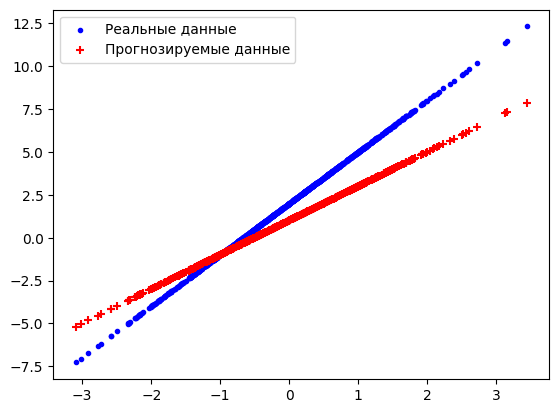

Текущие потери (ошибка): 1.920577


In [82]:
plot_data(xs, ys, model(xs))
print('Текущие потери (ошибка): %1.6f' % loss(model(xs), ys).numpy())

### Определение цикла обучения

Используя обучающие данные, обучим модель, используя градиентный спуск.
Градиентный спуск обновляет обучаемые веса и смещение **w** и **b**, чтобы уменьшить потери (ошибку) модели.

Существует множество вариантов схемы градиентного спуска, которые реализованы в модуле  `tf.keras.optimizers`. Реализуем здесь базовый градиентный спуск, используя `tf.GradientTape` для автоматического дифференцирования и `tf.assign_sub` для изменения значений весов и смещения (`assign_sub` объединяет `tf.assign` и `tf.sub`).

In [83]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

Теперь будем в цикле обновлять веса и смещения при помощи обучающих данных и смотреть, как эволюционируют `w` и `b`.

In [84]:
model = Model()

# Запоминаем историю значений 'w' и 'b' для визуализации
list_w, list_b = [], []
epochs = range(15)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=0.1)
  losses.append(current_loss)
  print('Эпоха %2d: w=%1.2f b=%1.2f, потери=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Эпоха  0: w=2.00 b=1.00, потери=1.92058
Эпоха  1: w=2.20 b=1.19, потери=1.25353
Эпоха  2: w=2.35 b=1.34, потери=0.81822
Эпоха  3: w=2.48 b=1.47, потери=0.53412
Эпоха  4: w=2.58 b=1.57, потери=0.34869
Эпоха  5: w=2.66 b=1.65, потери=0.22765
Эпоха  6: w=2.73 b=1.72, потери=0.14864
Эпоха  7: w=2.78 b=1.77, потери=0.09705
Эпоха  8: w=2.82 b=1.81, потери=0.06338
Эпоха  9: w=2.86 b=1.85, потери=0.04139
Эпоха 10: w=2.89 b=1.88, потери=0.02703
Эпоха 11: w=2.91 b=1.90, потери=0.01765
Эпоха 12: w=2.93 b=1.92, потери=0.01153
Эпоха 13: w=2.94 b=1.93, потери=0.00753
Эпоха 14: w=2.95 b=1.95, потери=0.00492


Отобразим прогресс обучаемых переменных в зависимости от эпох.

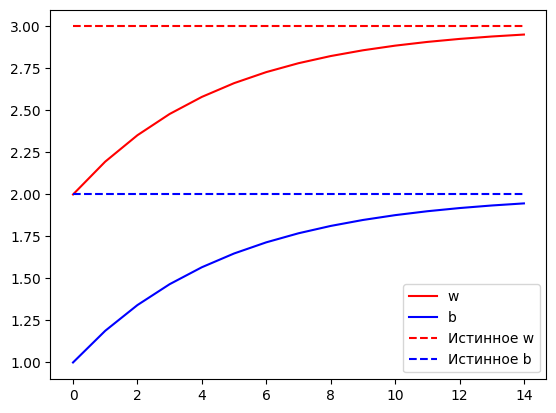

In [85]:
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'Истинное w', 'Истинное b'])
plt.show()

## Графики для оценки обучения

Теперь отобразим фактические результаты красным цветом, а прогнозы модели — синим на случайном наборе  тестовых точек.

Модель довольно точно делает прогнозы на тестовом наборе данных.

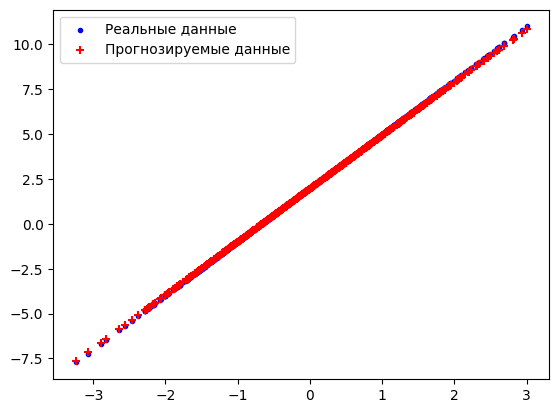

In [86]:
test_inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
test_outputs = test_inputs * TRUE_w + TRUE_b

predicted_test_outputs = model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)

Визуализируем функцию потерь в зависимости от значений каждого из обучаемых весов, к которым модель приблизилась с течением времени.

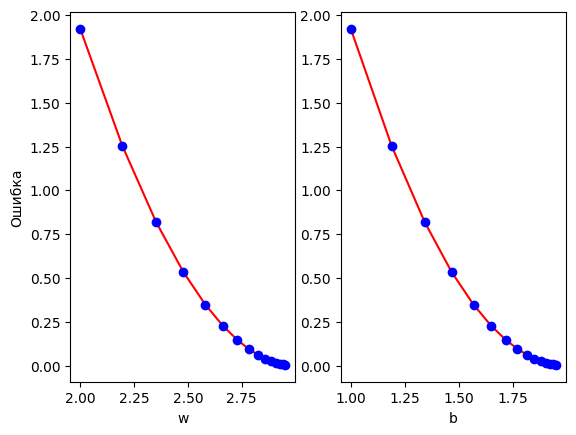

In [87]:
def plot_loss_for_weights(weights_list, losses):
  for idx, weights in enumerate(weights_list):
    plt.subplot(120 + idx + 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    if idx==0:
        plt.ylabel('Ошибка')


weights_list = [{ 'name' : "w",
                  'values' : list_w
                },
                {
                  'name' : "b",
                  'values' : list_b
                }]

plot_loss_for_weights(weights_list, losses)

#### Задание (10 баллов)

Для закрепленного за Вами варианта лабораторной работы:
   
1. Постройте тензор ранга 1 (вектор) со значениями заданной в индивидуальном задании функции одной переменной на заданном в индивидуальном задании отрезке и определите максимальное и минимальное значения функции.

2. Постройте график функции с прямыми, соответствующими максимальному и минимальному значениям, подписывая оси и рисунок и создавая легенду.

3. Найдите значения производной от функции порядка, указанного в индивидуальном задании, и постройте график полученной функции, подписывая оси и рисунок.

4. Постройте тензор ранга 2 (матрицу) со значениями заданной в индивидуальном задании функции двух переменных на заданном в индивидуальном задании прямоугольнике и определите максимальное и минимальное значения функции.

5. Постройте 3d график поверхности функции двух переменных, подписывая оси и рисунок.

6. Найдите значения смешанной производной от функции порядка, указанного в индивидуальном задании, и постройте 3d график поверхности полученной функции, подписывая оси и рисунок.

7. Решите задачу парной линейной регрессии при помощи модели TensorFlow, рассматривая тензор ранга 1 из пункта 1 задания как значения зависимой переменной (отклика), а точки отрезка из индивидуального задания как значения независимой переменной (предиктора). Предварительно масштабируйте независимую и зависимую переменные на интервал $[0, 1]$. Оцените качество полученной модели по показателю качества регрессии, указанному в индивидуальном задании. Количество эпох, скорость обучения и начальные значения весов выберите самостоятельно, обеспечивая сходимость итерационной процедуры.

8. Постройте кривую обучения для показателя качества регрессии, указанного в индивидуальном задании, с зависимостью от количества эпох. Показатель качества регрессия реализуйте как функцию с использованием функций модуля `tf.math`.

9. Изобразите на графике точки набора данных (независимой и зависимой переменных) и линию построенной парной регрессии, подписывая оси и рисунок и создавая легенду.